In [90]:
import pandas
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from sklearn.model_selection import train_test_split
import numpy as np

data = pandas.read_json("../json/tagged_remote_sensing_2017.json", orient="records")
known, unknown = train_test_split(data[["evi", "ndvi"]], test_size=0.2, random_state=2)

In [91]:
svr = NuSVR(nu=0.5, gamma=0.15, C=100, kernel="rbf")
svr = svr.fit(known[["ndvi"]], known["evi"])
unknown["evi_predicted"] = svr.predict(unknown[["ndvi"]])

/Users/ondrejpudis/Desktop/bachelor-thesis/env/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


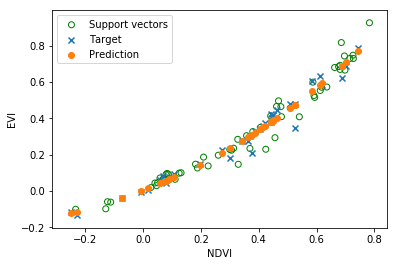

In [92]:
fig = plt.figure(figsize=(6,4))
plot_2d = fig.add_subplot(111)

plot_2d.set_xlabel("NDVI")
plot_2d.set_ylabel("EVI")

plot_2d.scatter(known["ndvi"].loc[svr.support_], known["evi"].loc[svr.support_], label='Support vectors',
                facecolor="none", edgecolor="g")

plot_2d.scatter(unknown["ndvi"], unknown["evi"], label="Target", marker="x")
plot_2d.scatter(unknown["ndvi"], unknown["evi_predicted"], label="Prediction")

plot_2d.legend()

fig.savefig(f"pdf/nu_svr.pdf", 
            dpi=600,
            format="pdf", 
            facecolor="none", 
            alpha=0, 
            edgecolor="none", 
            bbox_inches="tight",
            orientation="portrait")